In [ ]:
# Шаг 1. Импорт необходимых библиотек
import pandas as pd                      # Работа с таблицами (DataFrame)
import numpy as np                       # Математические операции и массивы
import matplotlib.pyplot as plt          # Графики
import seaborn as sns                    # Статистика и визуализация
from sklearn.ensemble import RandomForestRegressor  # Модель случайного леса для регрессии
from sklearn.model_selection import train_test_split  # Деление данных на обучение и тест
from sklearn.metrics import mean_squared_error        # Оценка модели (RMSE)
import joblib                            # Для сохранения модели

# Шаг 2. Загрузка данных
from google.colab import files
uploaded = files.upload()  # Загружаем файл boston.csv с локального компьютера

df = pd.read_csv("boston.csv")  # Загружаем данные в DataFrame
df.dropna(inplace=True)         # Удаляем строки с пропущенными значениями
df.head()                       # Показываем первые 5 строк таблицы


Saving boston.csv to boston.csv


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:

#  Шаг 3. Подготовка признаков
COLUMNS = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM',
    'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'
]

X = df[COLUMNS]
y = df['MEDV']


In [ ]:
# Шаг 4. Разделение данных
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42  # 20% данных — на тест
)


In [ ]:
#  Шаг 5. Обучение модели
from sklearn.metrics import mean_squared_error  # Импорт функции для вычисления среднеквадратичной ошибки
import numpy as np                              # Импорт библиотеки NumPy для математических операций

# Делаем предсказание модели на тестовых данных
y_pred = model.predict(X_test)

# Вычисляем среднеквадратичную ошибку (MSE) — чем меньше, тем лучше модель
mse = mean_squared_error(y_test, y_pred)  # Сравниваем предсказанные и реальные значения

# Вычисляем корень из MSE, чтобы получить RMSE (Root Mean Squared Error)
rmse = np.sqrt(mse)  # RMSE даёт ошибку в тех же единицах, что и целевая переменная (в тысячах долларов)

# Выводим RMSE с округлением до двух знаков после запятой
print(f"✅ RMSE: {rmse:.2f}")


✅ RMSE: 2.81


<ipython-input-7-f84a8a82c4f6>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_df, x='Importance', y='Feature', palette='coolwarm')


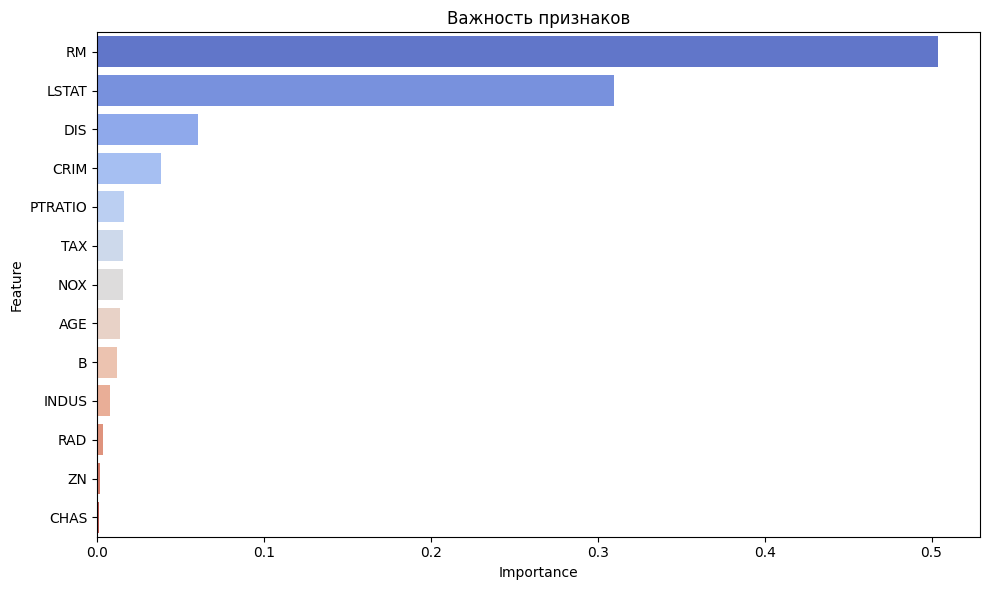

In [ ]:
# Шаг 6. График важности признаков
importances = model.feature_importances_  # Важность каждого признака по модели
feature_df = pd.DataFrame({
    'Feature': COLUMNS,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_df, x='Importance', y='Feature', palette='coolwarm')
plt.title("Важность признаков")  # Наиболее значимые признаки для предсказания цены
plt.tight_layout()
plt.show()


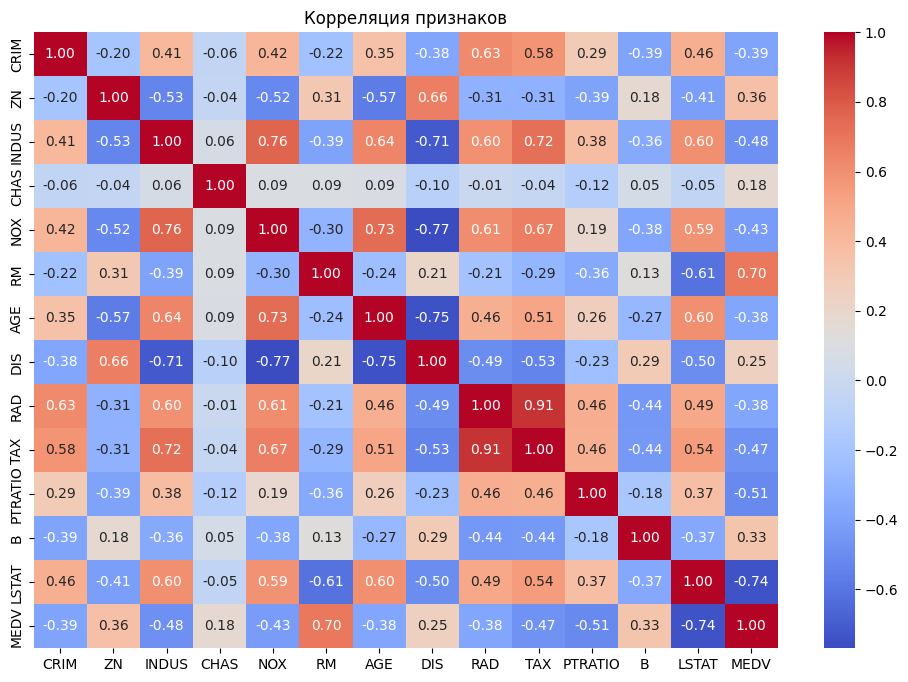

In [ ]:
# Шаг 7. Корреляционная матрица

plt.figure(figsize=(12, 8))  # Устанавливаем размер графика

# Строим тепловую карту (heatmap) на основе корреляционной матрицы
# df.corr() — вычисляет коэффициенты корреляции между всеми числовыми признаками в DataFrame
# annot=True — отображать числовые значения в ячейках
# fmt=".2f" — формат чисел: 2 знака после запятой
# cmap="coolwarm" — цветовая схема, от холодных (отрицательная корреляция) к теплым (положительная)
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")

plt.title("Корреляция признаков")  # Заголовок графика
plt.show()  # Отображаем график


In [ ]:

#  Шаг 8. Предсказание для условного дома
example_input = {
    'CRIM': 0.1,
    'ZN': 0.0,
    'INDUS': 8.0,
    'CHAS': 0,
    'NOX': 0.5,
    'RM': 6.0,
    'AGE': 70.0,
    'DIS': 3.0,
    'RAD': 4,
    'TAX': 300.0,
    'PTRATIO': 18.0,
    'B': 390.0,
    'LSTAT': 10.0
}

input_df = pd.DataFrame([example_input])
predicted_price = model.predict(input_df)[0]
print(f"💰 Предсказанная цена: ${predicted_price * 1000:.2f}")


💰 Предсказанная цена: $21090.00


In [ ]:

#  Шаг 9. Сохранение модели
joblib.dump(model, "model_weights.mw")
print("✅ Модель сохранена как model_weights.mw")


✅ Модель сохранена как model_weights.mw
